In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt

In [2]:
california_housing = fetch_california_housing(as_frame=True)

In [3]:
df_data = california_housing.data

In [4]:
df_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [5]:
df_target = california_housing.target

In [6]:
df_target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [7]:
df = df_data

In [8]:
df.insert(column = 'MedHouseVal', value = df_target, loc = 8)

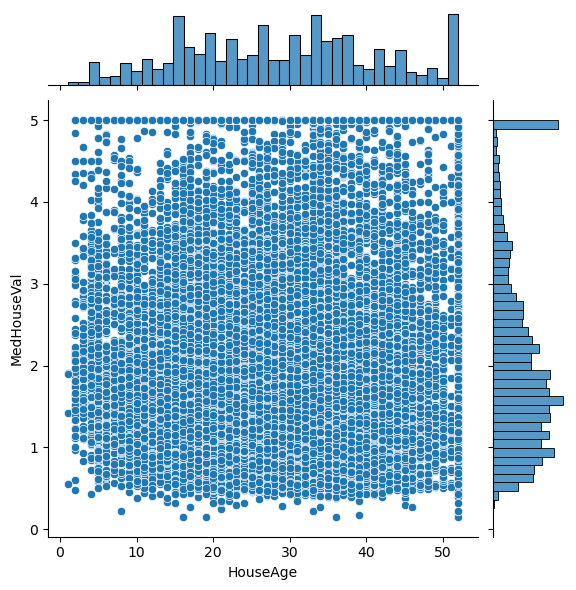

In [9]:
sns.jointplot(data=df, x="HouseAge", y="MedHouseVal")


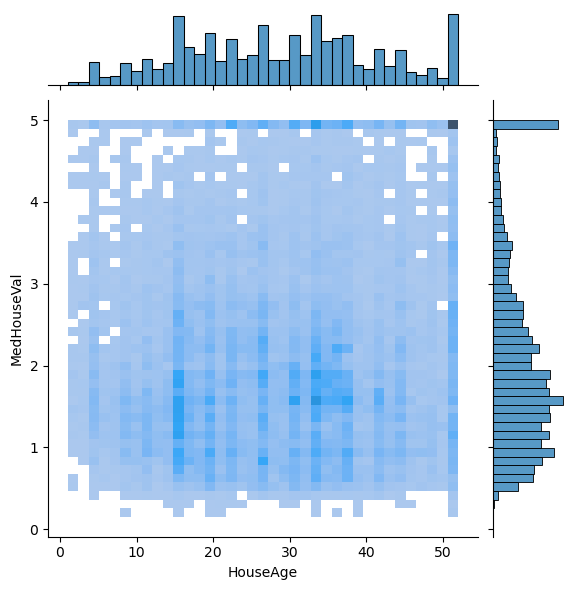

In [10]:
sns.jointplot(data=df, x="HouseAge", y="MedHouseVal", kind="hist")


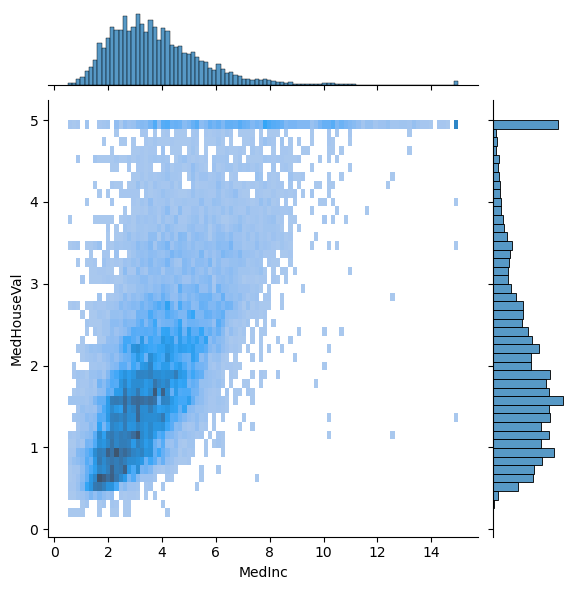

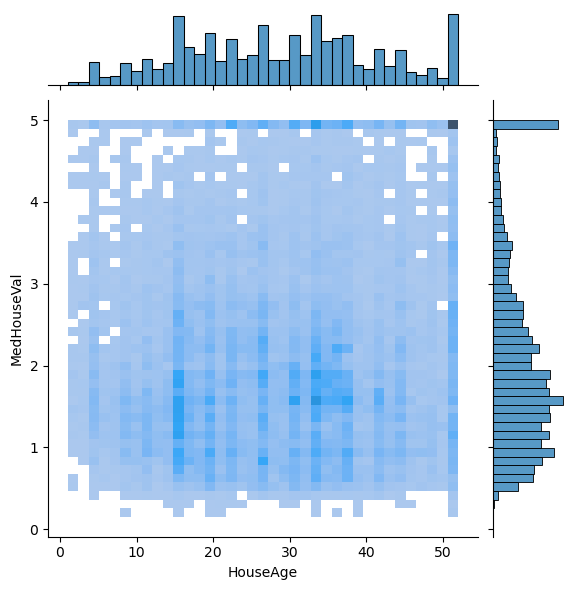

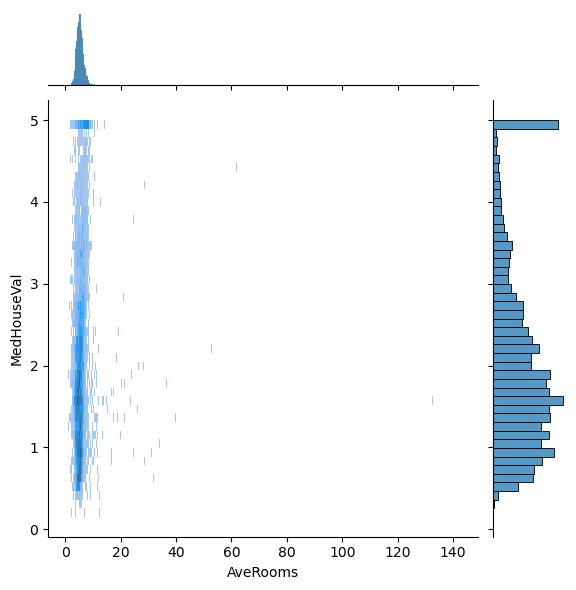

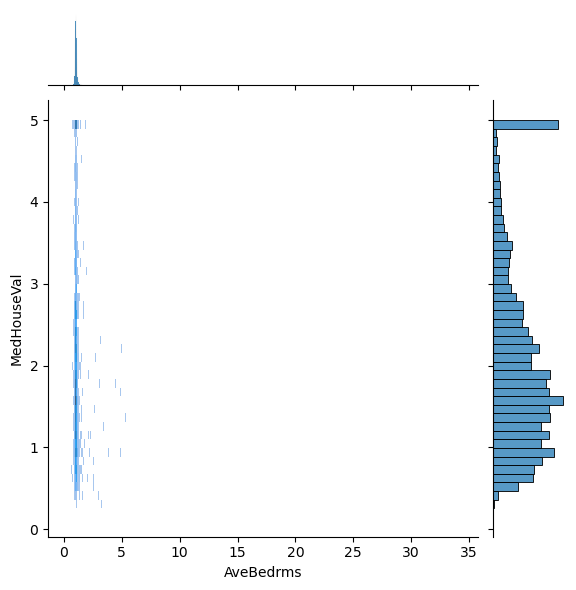

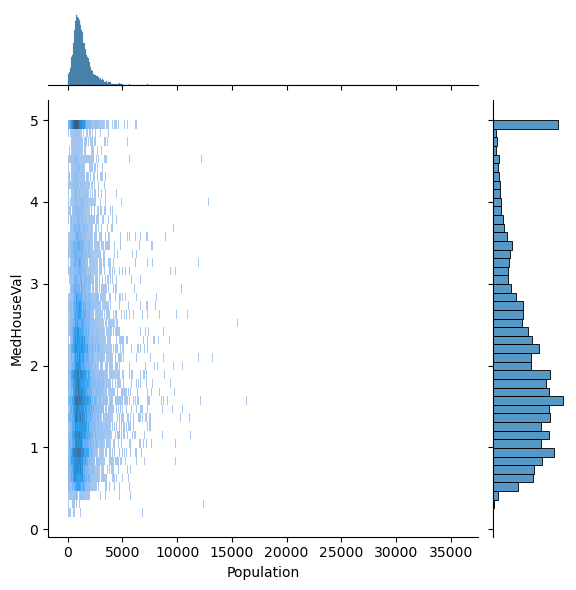

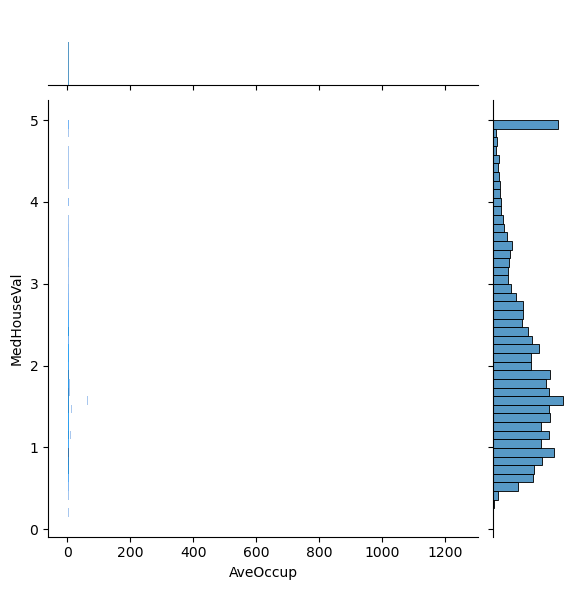

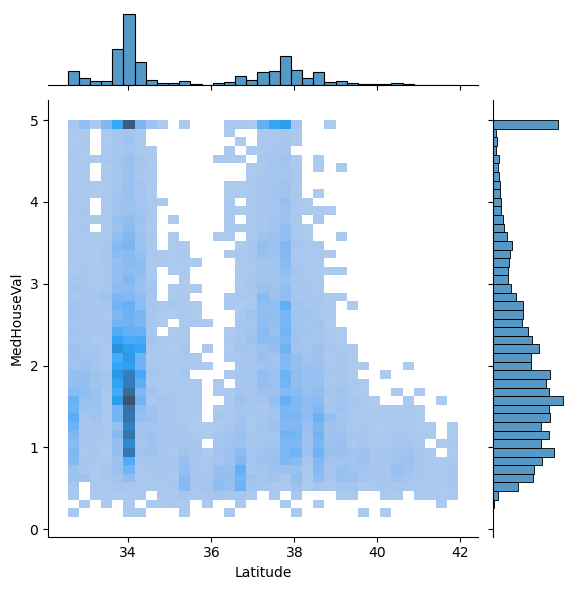

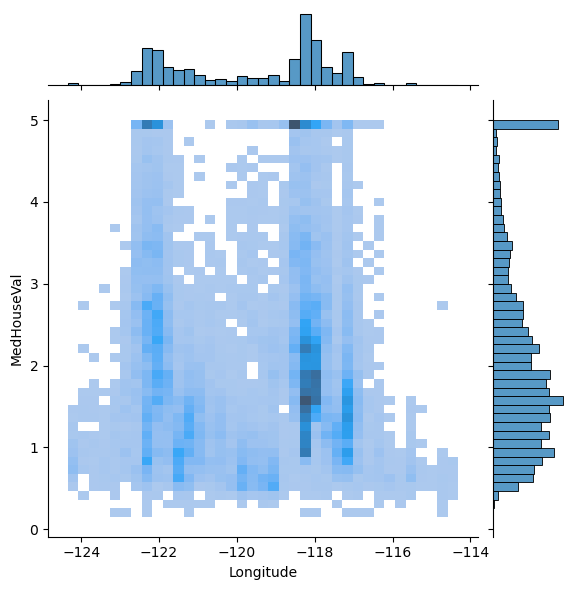

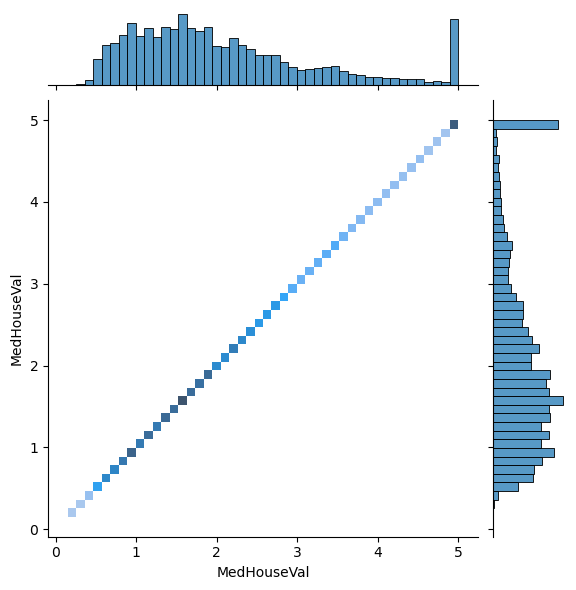

In [11]:
for col in df.columns:
        sns.jointplot(data=df, x=col, y="MedHouseVal", kind="hist")
        


In [12]:
corr_matrix = df.corr()

In [13]:
px.imshow(corr_matrix)

In [14]:
scaler = MinMaxScaler((0,1))
X_normalized = scaler.fit_transform(df_data)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, df_target, test_size=0.30, random_state=42) 

In [15]:
reg = LinearRegression().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))

Coefficients W
[ 5.83628402e-15 -1.55799602e-15 -5.64398884e-15  5.93526621e-15
  9.12720705e-16  4.53077928e-15 -1.08586867e-15  7.80143268e-17
  4.85002000e+00]
Intercept W0
0.14998999999999074
Error
9.58589111307216e-29


In [16]:
regLasso = LassoCV(alphas=(0.1,0.01,0.001)).fit(X_train, y_train)
print("Coefficients W")
print(regLasso.coef_)
print("Intercept W0")
print(regLasso.intercept_ )
y_pred = regLasso.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))

Coefficients W
[ 0.          0.          0.         -0.         -0.         -0.
 -0.         -0.          4.83246177]
Intercept W0
0.15693814282112606
Error
1.7202392107127904e-05


In [17]:
regRidge = RidgeCV((0.1,0.01,0.001)).fit(X_train, y_train)
print("Coefficients W")
print(regRidge.coef_)
print("Intercept W0")
print(regRidge.intercept_ )
y_pred = regRidge.predict(X_test)
print("Error")
print(mean_squared_error(y_test, y_pred))

Coefficients W
[ 2.00920213e-05  1.53600115e-06 -5.32999689e-05  8.13593824e-05
 -8.58487499e-08 -1.30114461e-05 -1.22565840e-05 -1.35470609e-05
  4.85000491e+00]
Intercept W0
0.15000086159214265
Error
5.131892252179526e-12


In [18]:
regLasso.alpha_

0.001

In [19]:
regRidge.alpha_

0.001

Може да се види дека се различни коефициентите, Lasso регресијата сите коефициенти освен последниот ги доведува до 0, а Ridge блиску до нула. Може да се воочи дека и Lasso и Ridge од параметрите кои се зададени во конструкторот имаат избрано 0.001. Ridge регресијата дава помал MSE.